# Data Staging: ETL

# Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# We uploaded our csv to github to access it through a RAW link and load it below.
global_superstore = pd.read_csv('https://raw.githubusercontent.com/ellitraboulsi/CSI4142-Project/29215ec4fd66bc538d22f51cc6ea6a3044bf25e6/Global_Superstore2.csv', encoding='ISO-8859-1')
global_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
global_superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

# Transformation

## Data Cleaning

We will start the data cleaning process by checking for NA values in our dataset and figuring out how to handle them.

In [4]:
na_count = global_superstore.isna().sum()
na_count

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

We notice that the only feature with NA values is the Postal Code feature. To decide how to proceed with handling this, we will check what percentage of all attributes have missing values.

In [5]:
non_na_postalcode = global_superstore[global_superstore.columns[11]].count() # number of non NA values in Postal Code column
percentage_non_na_postal_code = non_na_postalcode / len(global_superstore.index) * 100
percentage_non_na_postal_code

19.485279781633846

We only have Postal Code data in 19.5% of attributes therefore, we will drop this column.

In [6]:
global_superstore = global_superstore.drop('Postal Code', axis=1)

In [7]:
global_superstore = global_superstore.drop('Row ID', axis=1)

In [8]:
global_superstore.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

Now that we have handled NA values, we will check to make sure the datatypes of our features are appropriate.

In [9]:
global_superstore.dtypes

Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

We notice that order date and ship date are objects and should be changed to datetime. Everything else is appropriate. Let's change those datatypes.


In [10]:
global_superstore[["Order Date", "Ship Date"]] = global_superstore[["Order Date", "Ship Date"]].apply(pd.to_datetime, dayfirst = True)


In [11]:
global_superstore[["Order Date", "Ship Date"]].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

Here we change the Order Priority to numerical values, so that we can do analyses.

In [12]:
priority_mapping = {'Critical': 4, 'Medium': 2, 'High': 3, 'Low': 1}
global_superstore['Order Priority Numerical'] = global_superstore['Order Priority'].map(priority_mapping)

Let's check for duplicates

In [13]:
len(global_superstore)-len(global_superstore.drop_duplicates())

0

There are no duplicate rows in this dataset! Now let's check for typos by looking at unique values.

In [14]:
global_superstore['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [15]:
global_superstore['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [16]:
global_superstore['Order Priority'].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

In [17]:
global_superstore['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [18]:
global_superstore['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [19]:
global_superstore['Country'].unique()

array(['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France',
       'Italy', 'Tanzania', 'Poland', 'United Kingdom', 'Mexico',
       'El Salvador', 'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Canada', 'Philippines', 'Austria', 'Colombia',
       'Netherlands', 'Malaysia', 'Ecuador', 'Thailand', 'Somalia',
       'Guatemala', 'Belarus', 'Cambodia', 'South Africa', 'Japan',
       'Russia', 'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina',
       'Lesotho', 'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon',
       'Hungary', 'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland',
       'Ghana', 'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland',
       'Albania', 'Chad', 'Montenegro', 'Namibia', 'Portugal',
       'Madagascar', 'Sweden', 'Myanmar 

In [20]:
global_superstore['Region'].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [21]:
global_superstore['State'].unique()

array(['New York', 'New South Wales', 'Queensland', ..., 'Manicaland',
       'Kabarole', 'Matabeleland North'], dtype=object)

In [22]:
unique_cities = global_superstore['City'].unique()

for city in unique_cities:
    print(city)

New York City
Wollongong
Brisbane
Berlin
Dakar
Sydney
Porirua
Hamilton
Sacramento
Concord
Alexandria
Kabul
Jizan
Toledo
Mudanjiang
Paris
Henderson
Prato
Townsville
Uvinza
Bytom
Chicago
Suzhou
Edinburgh
Juárez
Soyapango
Taipei
Leipzig
Los Angeles
Surat
Santo Domingo
Saint-Brieuc
Amarillo
Gold Coast
Fresno
Kamina
Burlington
Stockton-on-Tees
Mataram
Gorakhpur
Thiruvananthapuram
Huddersfield
Minneapolis
Montreuil
Shouguang
Jamshedpur
Paysandú
Behshahr
Huntington Beach
Maputo
Bhopal
Seattle
Delhi
Geraldton
Tallahassee
Dhaka
Munster
Celle
Wuxi
Richmond
Seville
Raipur
Gómez Palacio
Kharkiv
Jinan
Chinandega
Kananga
Palembang
London
Melbourne
Atlanta
Duisburg
Nanchong
Naihati
Lille
Meknes
Jackson
Philadelphia
Krefeld
Bandung
Casablanca
Tongi
Montréal
Manila
Newcastle
Graz
Nowra
Boulogne-Billancourt
Malakoff
Kinshasa
Perth
Le Bouscat
Puebla
Augsburg
Nice
Medellín
Bergen op Zoom
Lakewood
Hanover
Vigo
Gaoyou
Bremen
Muret
Zigong
Adelaide
Detroit
Chelles
Kuantan
Harrisonburg
Everett
Quito
Vadodara
S

In [23]:
global_superstore['Customer ID'].unique()

array(['RH-19495', 'JR-16210', 'CR-12730', ..., 'RC-9825', 'MG-7890',
       'ZC-11910'], dtype=object)

In [24]:
global_superstore['Cost'] = global_superstore['Sales'] - global_superstore['Profit']
global_superstore['Sales Before Discount'] = global_superstore['Sales']/(1 - global_superstore['Discount'])
global_superstore['Sales Per Item'] = global_superstore['Sales']/global_superstore['Quantity']
global_superstore['Sales Per Item Before Discount'] = global_superstore['Sales Before Discount']/global_superstore['Quantity']
global_superstore['Order Year'] = global_superstore['Order Date'].dt.year
global_superstore['Order Month'] = global_superstore['Order Date'].dt.month
global_superstore['Order Day'] = global_superstore['Order Date'].dt.day
global_superstore['Ship Year'] = global_superstore['Ship Date'].dt.year
global_superstore['Ship Month'] = global_superstore['Ship Date'].dt.month
global_superstore['Ship Day'] = global_superstore['Ship Date'].dt.day

In [ ]:
global_superstore

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Cost,Sales Before Discount,Sales Per Item,Sales Per Item Before Discount,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,1547.4655,2309.65,329.950,329.95,2012,7,31,2012,7,31
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,3998.1600,4121.55,412.155,457.95,2013,2,5,2013,2,7
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,4255.2000,5750.19,575.019,638.91,2013,10,17,2013,10,18
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,2989.0500,3213.90,578.502,642.78,2013,1,28,2013,1,30
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,2521.4400,2832.96,354.120,354.12,2013,11,5,2013,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,...,60.6000,65.10,13.020,13.02,2014,6,19,2014,6,19
51286,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,...,1.5540,2.22,0.444,2.22,2014,6,20,2014,6,24
51287,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,...,11.6892,22.92,7.640,7.64,2013,12,2,2013,12,2
51288,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,...,11.0400,13.44,6.720,6.72,2012,2,18,2012,2,22


<ipython-input-26-f9618bad7000>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = global_superstore.corr()


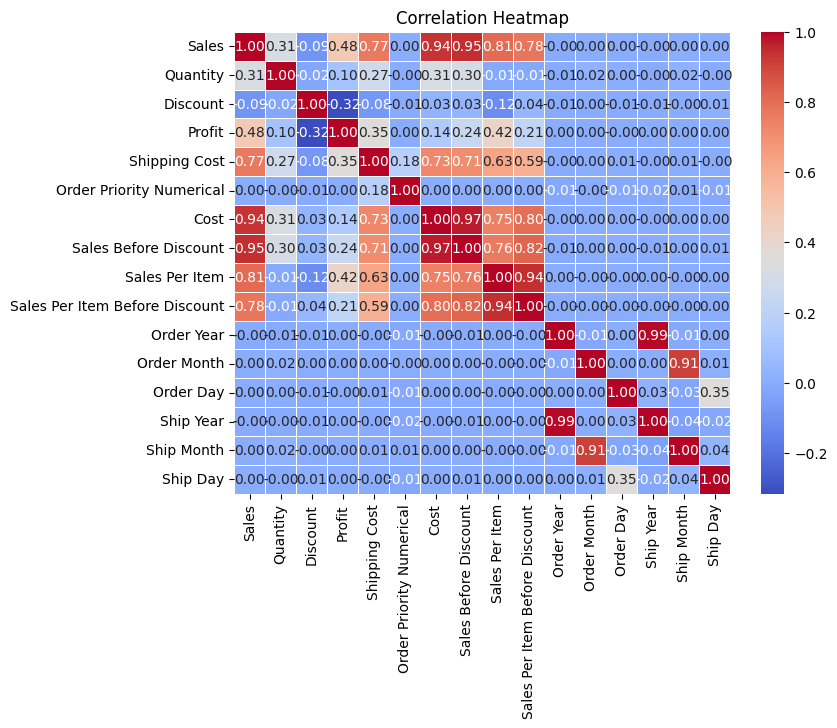

In [ ]:
correlation_matrix = global_superstore.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Outlier detection

In [ ]:
global_superstore_numeric = global_superstore[["Sales", "Quantity", "Discount", "Profit", "Shipping Cost", "Cost",	"Sales Before Discount", "Sales Per Item", "Sales Per Item Before Discount"]]

In [ ]:
global_superstore_numeric.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Cost,Sales Before Discount,Sales Per Item,Sales Per Item Before Discount
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,217.879599,292.581209,71.657487,85.121957
std,487.565361,2.278766,0.212280,174.340972,57.296804,430.901539,600.615431,113.581515,136.272759
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.554400,0.990000,0.336000,0.990000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,26.880000,38.460000,11.799900,14.190000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,73.635000,100.920000,29.400000,35.060000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,222.965000,296.340000,82.160000,103.590000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,24449.558400,45276.960000,3773.080000,7546.160000


As we can see, there seems to be outliers in all columns above. In all cases, the max value is much larger than the mean. Because the mean is influenced by very large or very small values, and the max value is still nowhere near the mean, the values are probably outliers.

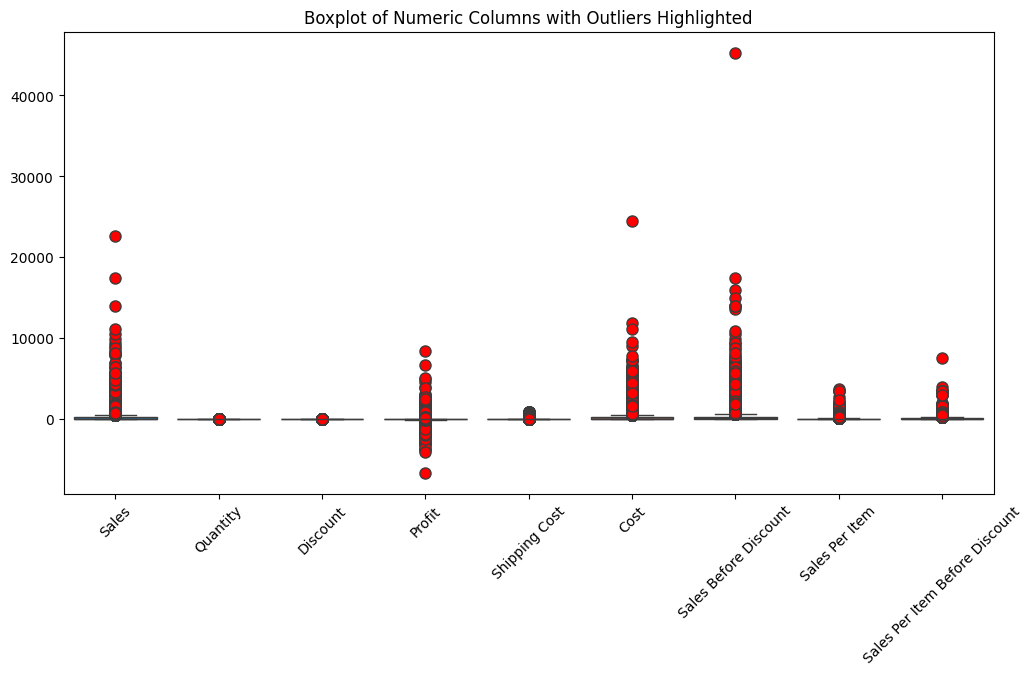

Outliers:
              Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1        IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2        IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3      ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4         SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   
...                ...        ...        ...           ...         ...   
15808     TU-2014-6470 2014-12-26 2014-12-28  Second Class     JG-5115   
16062   CA-2013-158841 2013-02-02 2013-02-04  Second Class    SE-20110   
16702   CA-2011-143917 2011-07-25 2011-07-27  Second Class    KL-16645   
22238   CA-2014-149881 2014-04-02 2014-04-04   First Class    NC-18535   
39564  ES-2012-5671193 2012-05-29 2012-05-29      Same Day    MG-18145   

          Customer Name      Segment           City            State  \
0           Rick Hansen     C

In [ ]:
numeric_columns = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost", "Cost",	"Sales Before Discount", "Sales Per Item", "Sales Per Item Before Discount"]

z_scores = (global_superstore[numeric_columns] - global_superstore[numeric_columns].mean()) / global_superstore[numeric_columns].std()
threshold = 10
outliers = (z_scores > threshold) | (z_scores < -threshold)

plt.figure(figsize=(12, 6))
sns.boxplot(data=global_superstore[numeric_columns], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Boxplot of Numeric Columns with Outliers Highlighted')
plt.xticks(rotation=45)
plt.show()

# Print outliers
print("Outliers:")
print(global_superstore[outliers.any(axis=1)])


In [ ]:
# remove outliers
global_superstore_no_outliers = global_superstore[~outliers.any(axis=1)]
len(global_superstore_no_outliers)

51149

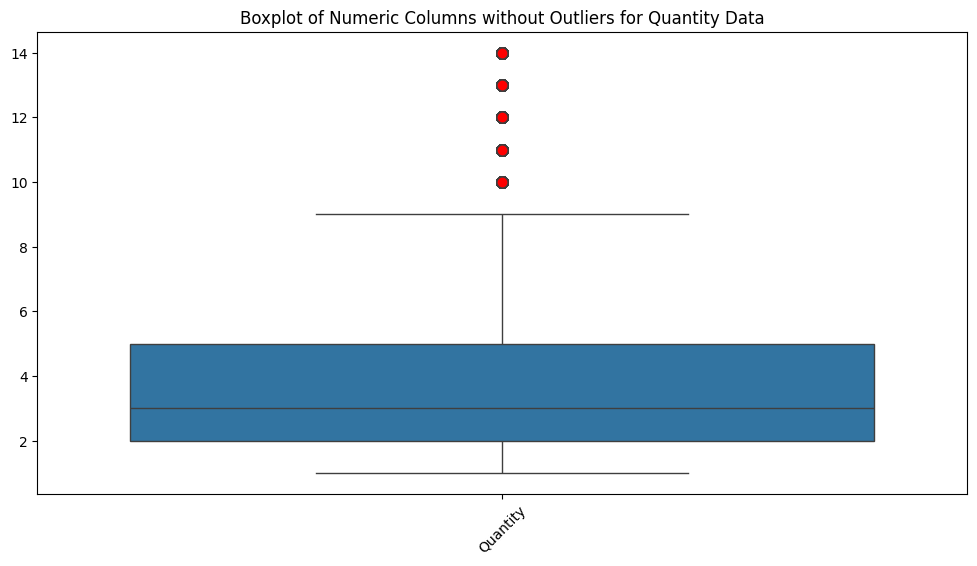

In [ ]:
# Visualize outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=global_superstore_no_outliers[['Quantity']], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Boxplot of Numeric Columns without Outliers for Quantity Data')
plt.xticks(rotation=45)
plt.show()


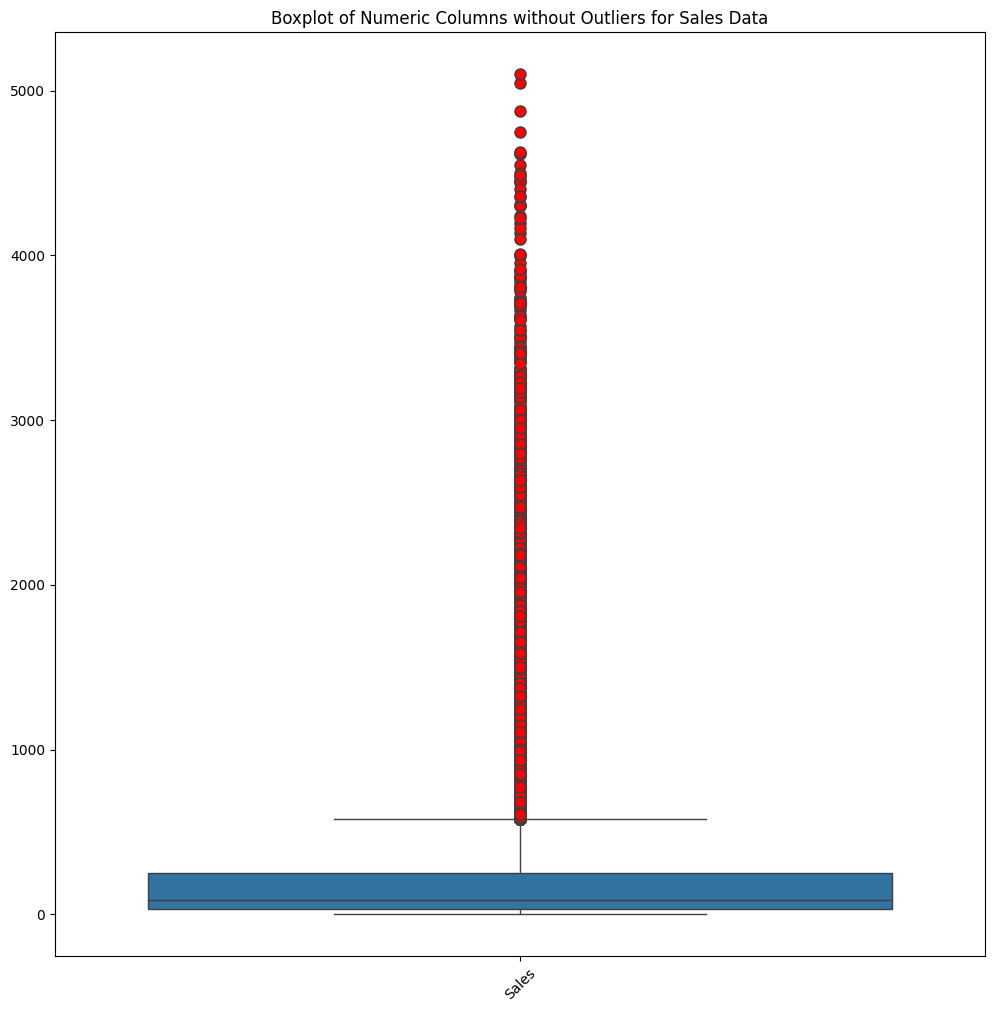

In [ ]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=global_superstore_no_outliers[['Sales']], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Boxplot of Numeric Columns without Outliers for Sales Data')
plt.xticks(rotation=45)
plt.show()

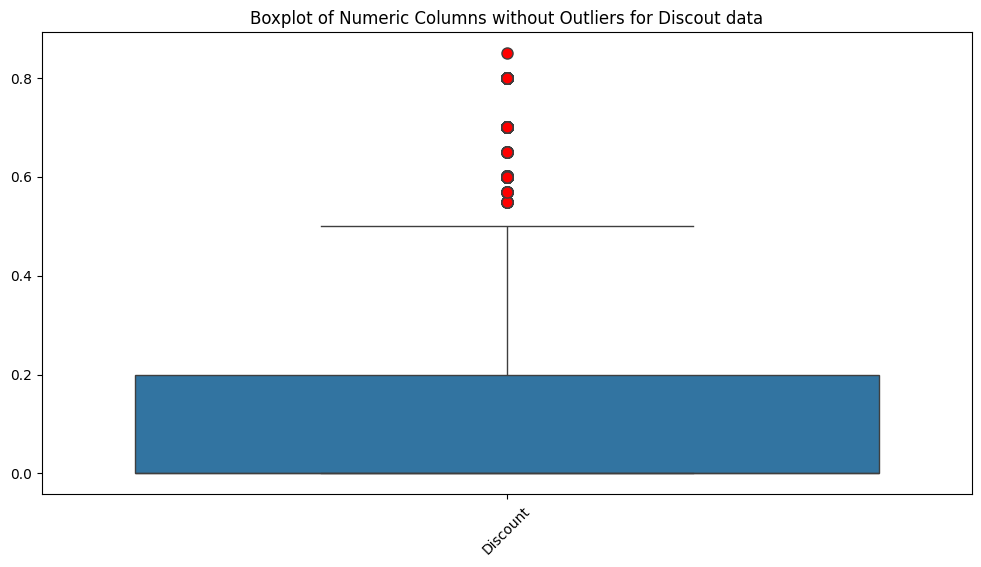

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=global_superstore_no_outliers[['Discount']], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Boxplot of Numeric Columns without Outliers for Discout data')
plt.xticks(rotation=45)
plt.show()

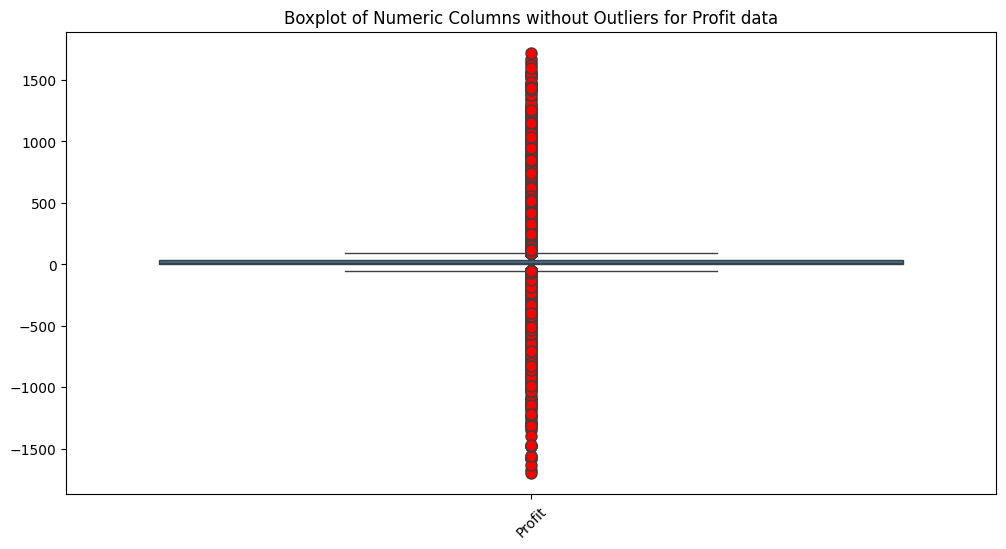

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=global_superstore_no_outliers[['Profit']], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Boxplot of Numeric Columns without Outliers for Profit data')
plt.xticks(rotation=45)
plt.show()

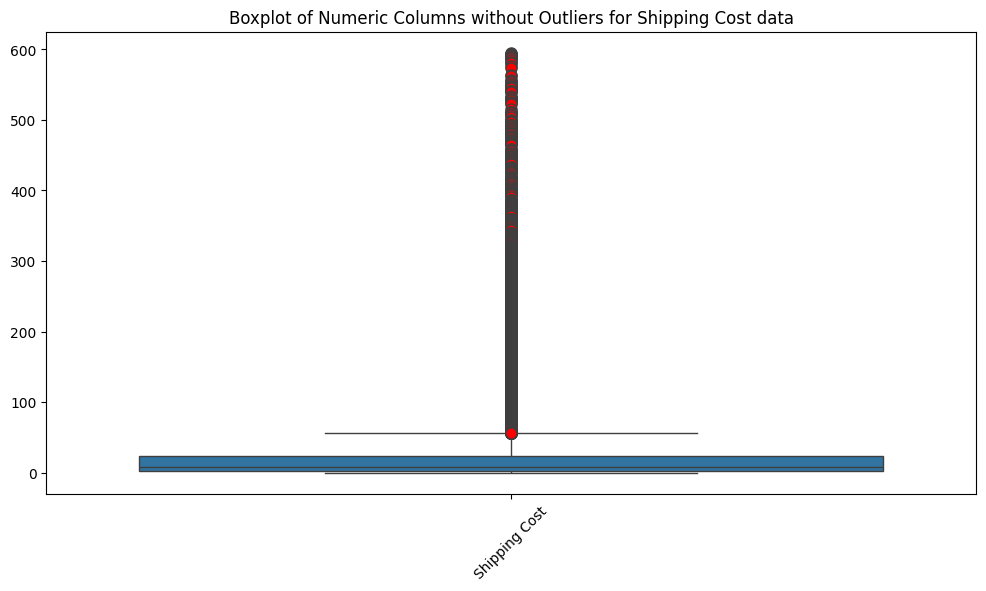

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=global_superstore_no_outliers[['Shipping Cost']], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Boxplot of Numeric Columns without Outliers for Shipping Cost data')
plt.xticks(rotation=45)
plt.show()

# Loading Process

In [ ]:
global_superstore['Order ID'].nunique()

25035

In [ ]:
global_superstore.shape[0] # number of rows

51290

In [ ]:
global_superstore[global_superstore['Order ID'] == 'IN-2011-35178']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Cost,Sales Before Discount,Sales Per Item,Sales Per Item Before Discount,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
461,IN-2011-35178,2011-11-11,2011-11-15,Standard Class,Dp-13240,Dean percer,Home Office,Suzhou,Gansu,China,...,4122.36,5725.35,636.15,636.15,2011,11,11,2011,11,15
10548,IN-2011-35178,2011-11-11,2011-11-15,Standard Class,Dp-13240,Dean percer,Home Office,Suzhou,Gansu,China,...,325.32,382.68,191.34,191.34,2011,11,11,2011,11,15
25625,IN-2011-35178,2011-11-11,2011-11-15,Standard Class,Dp-13240,Dean percer,Home Office,Suzhou,Gansu,China,...,90.96,113.64,28.41,28.41,2011,11,11,2011,11,15
27348,IN-2011-35178,2011-11-11,2011-11-15,Standard Class,Dp-13240,Dean percer,Home Office,Suzhou,Gansu,China,...,55.98,107.55,35.85,35.85,2011,11,11,2011,11,15


In [ ]:
global_superstore['Customer ID'].nunique()

1590

In [ ]:
global_superstore['Customer Name'].nunique()

795

# Surrogate Key Generation

In [ ]:
global_superstore.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Order Priority Numerical', 'Cost',
       'Sales Before Discount', 'Sales Per Item',
       'Sales Per Item Before Discount', 'Order Year', 'Order Month',
       'Order Day', 'Ship Year', 'Ship Month', 'Ship Day'],
      dtype='object')

In [ ]:
total_rows = len(global_superstore)

customer_dimension = pd.DataFrame(columns=['Customer Key', 'Customer ID', 'Customer Name'])
location_dimension = pd.DataFrame(columns=['Location Key', 'Market', 'Country', 'Region', 'State', 'City'])
shipping_dimension = pd.DataFrame(columns=['Shipping Key', 'Ship Mode', 'Shipping Cost'])
product_dimension = pd.DataFrame(columns=['Product Key', 'Product ID', 'Product Name', 'Category', 'Sub-Category'])
order_dimension = pd.DataFrame(columns=['Order Key', 'Order ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Priority Numerical', 'Segment', 'Cost', 'Sales Before Discount', 'Sales Per Item', 'Sales Per Item Before Discount'])
order_date_dimension = pd.DataFrame(columns=['Order Date Key', 'Order Date', 'Order Year', 'Order Month', 'Order Day'])
ship_date_dimension = pd.DataFrame(columns=['Ship Date Key', 'Ship Date', 'Ship Year', 'Ship Month', 'Ship Day'])
fact_table = pd.DataFrame(columns = ['Customer Key', 'Location Key', 'Shipping Key', 'Product Key', 'Order Key', 'Order Date Key', 'Ship Date Key', 'Quantity Sold', 'Total Price'])

customer_key = 100000
location_key = 200000
shipping_key = 300000
product_key = 400000
order_key = 500000
order_date_key = 600000
ship_date_key = 700000

customer_id_to_key_map = {}
location_combination_to_key_map = {}
shipping_combination_to_key_map = {}
product_combination_to_key_map = {}
order_combination_to_key_map = {}
order_date_to_key_map = {}
ship_date_to_key_map = {}


for index, row in tqdm(global_superstore.iterrows(), total=total_rows):

    customer_id = row['Customer ID']
    customer_name = row['Customer Name']
    market = row['Market']
    country = row['Country']
    region = row['Region']
    state = row['State']
    city = row['City']
    ship_mode = row['Ship Mode']
    shipping_cost = row['Shipping Cost']
    product_id = row['Product ID']
    product_name = row['Product Name']
    category = row['Category']
    sub_category = row['Sub-Category']
    order_id = row['Order ID']
    sales = row['Sales']
    quantity = row['Quantity']
    discount = row['Discount']
    profit = row['Profit']
    order_priority_numerical = row['Order Priority Numerical']
    segment = row['Segment']
    cost = row['Cost']
    sales_before_discount = row['Sales Before Discount']
    sales_per_item = row['Sales Per Item']
    sales_per_item_before_discount = row['Sales Per Item Before Discount']
    order_date = row['Order Date']
    order_year = row['Order Year']
    order_month = row['Order Month']
    order_day = row['Order Day']
    ship_date = row['Ship Date']
    ship_year = row['Ship Year']
    ship_month = row['Ship Month']
    ship_day = row['Ship Day']


    if customer_id not in customer_id_to_key_map:
        customer_id_to_key_map[customer_id] = customer_key
        temp_customer_df = pd.DataFrame({'Customer Key': [customer_key], 'Customer ID': [customer_id], 'Customer Name': [customer_name]})
        customer_dimension = pd.concat([customer_dimension, temp_customer_df], ignore_index=True)
        customer_key_for_fact_table = customer_key
        customer_key += 1
    else:
        customer_key_for_fact_table = customer_id_to_key_map[customer_id]

    location_combination = (market, country, region, state, city)
    if location_combination not in location_combination_to_key_map:
        location_combination_to_key_map[location_combination] = location_key
        temp_location_df = pd.DataFrame({'Location Key': [location_key], 'Market': [market], 'Country': [country], 'Region': [region], 'State': [state], 'City': [city]})
        location_dimension = pd.concat([location_dimension, temp_location_df], ignore_index=True)
        location_key_for_fact_table = location_key
        location_key += 1
    else:
        location_key_for_fact_table = location_combination_to_key_map[location_combination]

    shipping_combination = (ship_mode, shipping_cost)
    if shipping_combination not in shipping_combination_to_key_map:
        shipping_combination_to_key_map[shipping_combination] = shipping_key
        temp_shipping_df = pd.DataFrame({'Shipping Key': [shipping_key], 'Ship Mode': [ship_mode], 'Shipping Cost': [shipping_cost]})
        shipping_dimension = pd.concat([shipping_dimension, temp_shipping_df], ignore_index=True)
        shipping_key_for_fact_table = shipping_key
        shipping_key += 1
    else:
        shipping_key_for_fact_table = shipping_combination_to_key_map[shipping_combination]

    product_combination = (product_id, product_name, category, sub_category)
    if product_combination not in product_combination_to_key_map:
        product_combination_to_key_map[product_combination] = product_key
        temp_product_df = pd.DataFrame({'Product Key': [product_key], 'Product ID': [product_id], 'Product Name': [product_name], 'Category': [category], 'Sub-Category': [sub_category]})
        product_dimension = pd.concat([product_dimension, temp_product_df], ignore_index=True)
        product_key_for_fact_table = product_key
        product_key += 1
    else:
        product_key_for_fact_table = product_combination_to_key_map[product_combination]

    order_combination = (order_id, sales, quantity, discount, profit, order_priority_numerical, segment, cost, sales_before_discount, sales_per_item, sales_per_item_before_discount)
    if order_combination not in order_combination_to_key_map:
        order_combination_to_key_map[order_combination] = order_key
        temp_order_df = pd.DataFrame({'Order Key': [order_key], 'Order ID': [order_id], 'Sales': [sales], 'Quantity': [quantity], 'Discount': [discount], 'Profit': [profit], 'Order Priority Numerical': [order_priority_numerical],
                                      'Segment': [segment], 'Cost': [cost], 'Sales Before Discount': [sales_before_discount], 'Sales Per Item': [sales_per_item], 'Sales Per Item Before Discount': [sales_per_item_before_discount]})
        order_dimension = pd.concat([order_dimension, temp_order_df], ignore_index=True)
        order_key_for_fact_table = order_key
        order_key += 1
    else:
        order_key_for_fact_table = order_combination_to_key_map[order_combination]

    if order_date not in order_date_to_key_map:
        order_date_to_key_map[order_date] = order_date_key
        temp_order_date_df = pd.DataFrame({'Order Date Key': [order_date_key], 'Order Date': [order_date], 'Order Year': [order_year], 'Order Month': [order_month], 'Order Day': [order_day]})
        order_date_dimension = pd.concat([order_date_dimension, temp_order_date_df], ignore_index=True)
        order_date_key_for_fact_table = order_date_key
        order_date_key += 1
    else:
        order_date_key_for_fact_table = order_date_to_key_map[order_date]

    if ship_date not in ship_date_to_key_map:
        ship_date_to_key_map[ship_date] = ship_date_key
        temp_ship_date_df = pd.DataFrame({'Ship Date Key': [ship_date_key], 'Ship Date': [ship_date], 'Ship Year': [ship_year], 'Ship Month': [ship_month], 'Ship Day': [ship_day]})
        ship_date_dimension = pd.concat([ship_date_dimension, temp_ship_date_df], ignore_index=True)
        ship_date_key_for_fact_table = ship_date_key
        ship_date_key += 1
    else:
        ship_date_key_for_fact_table = ship_date_to_key_map[ship_date]

    temp_fact_df = pd.DataFrame({'Customer Key': [customer_key_for_fact_table], 'Location Key': [location_key_for_fact_table], 'Shipping Key': [shipping_key_for_fact_table], 'Product Key': [product_key_for_fact_table], 'Order Key': [order_key_for_fact_table],
                                 'Order Date Key': [order_date_key_for_fact_table], 'Ship Date Key': [ship_date_key_for_fact_table], 'Quantity Sold': [quantity], 'Total Price': [sales]})
    fact_table = pd.concat([fact_table, temp_fact_df], ignore_index=True)

100%|██████████| 51290/51290 [12:19<00:00, 69.36it/s]


In [ ]:
customer_dimension

,Customer Key,Customer ID,Customer Name
0,100000,RH-19495,Rick Hansen
1,100001,JR-16210,Justin Ritter
2,100002,CR-12730,Craig Reiter
3,100003,KM-16375,Katherine Murray
4,100004,RH-9495,Rick Hansen
...,...,...,...
1585,101585,SC-10800,Stuart Calhoun
1586,101586,BD-1500,Bradley Drucker
1587,101587,RC-9825,Roy Collins
1588,101588,MG-7890,Michael Granlund


In [ ]:
location_dimension

,Location Key,Market,Country,Region,State,City
0,200000,US,United States,East,New York,New York City
1,200001,APAC,Australia,Oceania,New South Wales,Wollongong
2,200002,APAC,Australia,Oceania,Queensland,Brisbane
3,200003,EU,Germany,Central,Berlin,Berlin
4,200004,Africa,Senegal,Africa,Dakar,Dakar
...,...,...,...,...,...,...
3814,203814,US,United States,West,California,San Luis Obispo
3815,203815,US,United States,Central,Texas,Abilene
3816,203816,EMEA,Turkey,EMEA,Kayseri,Felahiye
3817,203817,US,United States,West,Idaho,Lewiston


In [ ]:
shipping_dimension

,Shipping Key,Ship Mode,Shipping Cost
0,300000,Same Day,933.57
1,300001,Second Class,923.63
2,300002,First Class,915.49
3,300003,First Class,910.16
4,300004,Same Day,903.04
...,...,...,...
17617,317617,First Class,0.01
17618,317618,Same Day,0.01
17619,317619,Standard Class,0.01
17620,317620,Standard Class,0.00


In [ ]:
product_dimension

,Product Key,Product ID,Product Name,Category,Sub-Category
0,400000,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories
1,400001,FUR-CH-10003950,"Novimex Executive Leather Armchair, Black",Furniture,Chairs
2,400002,TEC-PH-10004664,"Nokia Smart Phone, with Caller ID",Technology,Phones
3,400003,TEC-PH-10004583,"Motorola Smart Phone, Cordless",Technology,Phones
4,400004,TEC-SHA-10000501,"Sharp Wireless Fax, High-Speed",Technology,Copiers
...,...,...,...,...,...
10763,410763,OFF-FA-10004112,"Stockwell Staples, 12 Pack",Office Supplies,Fasteners
10764,410764,OFF-BI-10003253,"Ibico Index Tab, Economy",Office Supplies,Binders
10765,410765,OFF-BI-10002510,"Acco Index Tab, Clear",Office Supplies,Binders
10766,410766,FUR-ADV-10002329,"Advantus Light Bulb, Erganomic",Furniture,Furnishings


In [ ]:
order_dimension

,Order Key,Order ID,Sales,Quantity,Discount,Profit,Order Priority Numerical,Segment,Cost,Sales Before Discount,Sales Per Item,Sales Per Item Before Discount
0,500000,CA-2012-124891,2309.650,7,0.0,762.1845,4,Consumer,1547.4655,2309.65,329.950,329.95
1,500001,IN-2013-77878,3709.395,9,0.1,-288.7650,4,Corporate,3998.1600,4121.55,412.155,457.95
2,500002,IN-2013-71249,5175.171,9,0.1,919.9710,2,Consumer,4255.2000,5750.19,575.019,638.91
3,500003,ES-2013-1579342,2892.510,5,0.1,-96.5400,2,Home Office,2989.0500,3213.90,578.502,642.78
4,500004,SG-2013-4320,2832.960,8,0.0,311.5200,4,Consumer,2521.4400,2832.96,354.120,354.12
...,...,...,...,...,...,...,...,...,...,...,...,...
51275,551275,IN-2014-62366,65.100,5,0.0,4.5000,2,Corporate,60.6000,65.10,13.020,13.02
51276,551276,US-2014-102288,0.444,1,0.8,-1.1100,2,Consumer,1.5540,2.22,0.444,2.22
51277,551277,US-2013-155768,22.920,3,0.0,11.2308,3,Home Office,11.6892,22.92,7.640,7.64
51278,551278,MX-2012-140767,13.440,2,0.0,2.4000,2,Home Office,11.0400,13.44,6.720,6.72


In [ ]:
order_date_dimension

,Order Date Key,Order Date,Order Year,Order Month,Order Day
0,600000,2012-07-31,2012,7,31
1,600001,2013-02-05,2013,2,5
2,600002,2013-10-17,2013,10,17
3,600003,2013-01-28,2013,1,28
4,600004,2013-11-05,2013,11,5
...,...,...,...,...,...
1425,601425,2011-06-12,2011,6,12
1426,601426,2012-07-08,2012,7,8
1427,601427,2013-07-07,2013,7,7
1428,601428,2012-05-27,2012,5,27


In [ ]:
ship_date_dimension

,Ship Date Key,Ship Date,Ship Year,Ship Month,Ship Day
0,700000,2012-07-31,2012,7,31
1,700001,2013-02-07,2013,2,7
2,700002,2013-10-18,2013,10,18
3,700003,2013-01-30,2013,1,30
4,700004,2013-11-06,2013,11,6
...,...,...,...,...,...
1459,701459,2012-01-24,2012,1,24
1460,701460,2012-02-15,2012,2,15
1461,701461,2012-07-23,2012,7,23
1462,701462,2012-04-08,2012,4,8


In [ ]:
fact_table

,Customer Key,Location Key,Shipping Key,Product Key,Order Key,Order Date Key,Ship Date Key,Quantity Sold,Total Price
0,100000,200000,300000,400000,500000,600000,700000,7,2309.650
1,100001,200001,300001,400001,500001,600001,700001,9,3709.395
2,100002,200002,300002,400002,500002,600002,700002,9,5175.171
3,100003,200003,300003,400003,500003,600003,700003,5,2892.510
4,100004,200004,300004,400004,500004,600004,700004,8,2832.960
...,...,...,...,...,...,...,...,...,...
51285,100665,200861,317618,405301,551275,600856,700315,5,65.100
51286,100044,200130,317619,410681,551276,600270,701005,1,0.444
51287,100023,201860,317618,409458,551277,600061,700088,3,22.920
51288,100255,201350,317620,407196,551278,601077,701149,2,13.440


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#customer_dimension.to_csv('/content/drive/My Drive/uOttawa/Data Science/customer_dimension.csv', index=False)
#location_dimension.to_csv('/content/drive/My Drive/uOttawa/Data Science/location_dimension.csv', index=False)
#shipping_dimension.to_csv('/content/drive/My Drive/uOttawa/Data Science/shipping_dimension.csv', index=False)
#product_dimension.to_csv('/content/drive/My Drive/uOttawa/Data Science/product_dimension.csv', index=False)
#order_dimension.to_csv('/content/drive/My Drive/uOttawa/Data Science/order_dimension.csv', index=False)
#order_date_dimension.to_csv('/content/drive/My Drive/uOttawa/Data Science/order_date_dimension.csv', index=False)
#ship_date_dimension.to_csv('/content/drive/My Drive/uOttawa/Data Science/ship_date_dimension.csv', index=False)
#fact_table.to_csv('/content/drive/My Drive/uOttawa/Data Science/fact_table.csv', index=False)
global_superstore.to_csv('/content/drive/My Drive/uOttawa/Data Science/global_superstore_final.csv', index=False)

Mounted at /content/drive


In [ ]:
country_aggregated = global_superstore.groupby(['Country', 'Product Name'])['Quantity'].sum().reset_index()
country_aggregated

,Country,Product Name,Quantity
0,Afghanistan,"Acme Box Cutter, High Speed",4
1,Afghanistan,"Acme Box Cutter, Serrated",2
2,Afghanistan,"Acme Scissors, Easy Grip",9
3,Afghanistan,"Apple Audio Dock, VoIP",3
4,Afghanistan,"Avery Binder Covers, Durable",3
...,...,...,...
31960,Zimbabwe,"Wilson Jones Binder Covers, Clear",1
31961,Zimbabwe,"Wilson Jones Binder Covers, Recycled",1
31962,Zimbabwe,"Wilson Jones Hole Reinforcements, Clear",1
31963,Zimbabwe,"Wilson Jones Hole Reinforcements, Economy",1


In [ ]:
country_aggregated = global_superstore.groupby(['Country', 'Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
country_aggregated

,Country,Category,Sales,Profit
0,Afghanistan,Furniture,11285.190,2797.890
1,Afghanistan,Office Supplies,3925.560,1125.690
2,Afghanistan,Technology,6462.570,1536.720
3,Albania,Furniture,835.950,246.330
4,Albania,Office Supplies,611.820,141.120
...,...,...,...,...
413,Zambia,Office Supplies,7527.180,1906.080
414,Zambia,Technology,8298.480,1814.130
415,Zimbabwe,Furniture,981.837,-1752.033
416,Zimbabwe,Office Supplies,1770.129,-2463.291


In [ ]:
country_aggregated[country_aggregated['Country'] == 'Australia']

,Country,Category,Sales,Profit
17,Australia,Furniture,339239.868,24698.838
18,Australia,Office Supplies,245783.541,31481.091
19,Australia,Technology,340212.444,47727.504


In [ ]:
country_aggregated_sorted = country_aggregated.sort_values(by='Sales', ascending=False)
print(country_aggregated_sorted)

               Country         Category        Sales       Profit
396      United States       Technology  836154.0330  145454.9481
394      United States        Furniture  741999.7953   18451.2728
395      United States  Office Supplies  719047.0320  122490.8008
19           Australia       Technology  340212.4440   47727.5040
17           Australia        Furniture  339239.8680   24698.8380
..                 ...              ...          ...          ...
26             Bahrain  Office Supplies      44.1600       6.6000
110  Equatorial Guinea  Office Supplies      26.2200       2.2200
16             Armenia  Office Supplies      20.4900       2.8500
112            Eritrea  Office Supplies      17.8200       3.1800
359         Tajikistan  Office Supplies       7.4520     -11.8380

[418 rows x 4 columns]


In [ ]:
region_country_aggregated = global_superstore.groupby(['Region', 'Category']).agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()
region_country_aggregated

,Region,Category,Sales,Profit
0,Africa,Furniture,308.479612,25.771926
1,Africa,Office Supplies,87.604444,9.353055
2,Africa,Technology,353.860640,48.440717
3,Canada,Furniture,252.268571,62.220000
4,Canada,Office Supplies,108.426282,28.727545
5,Canada,Technology,404.597077,111.486462
6,Caribbean,Furniture,314.820213,16.551755
7,Caribbean,Office Supplies,92.061065,15.229472
8,Caribbean,Technology,341.152625,39.676202
9,Central,Furniture,420.536453,26.662190


In [ ]:
customer_aggregated = global_superstore.groupby(['Customer Name','Order Year']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
customer_aggregated

,Customer Name,Order Year,Sales,Profit
0,Aaron Bergman,2011,958.1020,189.2645
1,Aaron Bergman,2012,6931.9923,423.9123
2,Aaron Bergman,2013,10134.4790,2489.4070
3,Aaron Bergman,2014,6620.0542,1580.6242
4,Aaron Hawkins,2011,8830.7095,1528.2557
...,...,...,...,...
3174,Zuschuss Carroll,2014,4930.0120,960.9290
3175,Zuschuss Donatelli,2011,2442.8420,-610.9506
3176,Zuschuss Donatelli,2012,3360.9255,-243.7345
3177,Zuschuss Donatelli,2013,3740.6040,588.0745


In [ ]:
country_order_year_aggregated = global_superstore.groupby(['Country', 'Order Year']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
country_order_year_aggregated

,Country,Order Year,Sales,Profit
0,Afghanistan,2011,1729.410,293.940
1,Afghanistan,2012,9071.820,1924.140
2,Afghanistan,2013,4242.810,1148.940
3,Afghanistan,2014,6629.280,2093.280
4,Albania,2011,1707.540,267.540
...,...,...,...,...
532,Zambia,2014,5398.620,1665.780
533,Zimbabwe,2011,884.853,-1088.277
534,Zimbabwe,2012,1025.865,-1475.325
535,Zimbabwe,2013,413.505,-646.605


In [ ]:
subCategory_aggregated = global_superstore.groupby(['Order Year', 'Sub-Category'])['Quantity'].sum().reset_index()
subCategory_aggregated

,Order Year,Sub-Category,Quantity
0,2011,Accessories,1839
1,2011,Appliances,1132
2,2011,Art,2931
3,2011,Binders,3659
4,2011,Bookcases,1422
...,...,...,...
63,2014,Paper,4107
64,2014,Phones,3936
65,2014,Storage,5729
66,2014,Supplies,3038


In [ ]:
product_aggregated = global_superstore.groupby(['Product Name']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
product_aggregated

,Product Name,Sales,Profit
0,"""While you Were Out"" Message Book, One Form pe...",25.228,10.3880
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300,16.7678
2,#10 Self-Seal White Envelopes,108.682,52.1230
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,223.1408
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,115.2806
...,...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660,115.6440
3784,iOttie HLCRIO102 Car Mount,215.892,-11.9940
3785,iOttie XL Car Mount,223.888,-50.3748
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554,171.2648


In [ ]:
sub_category_aggregated = global_superstore.groupby(['Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sub_category_aggregated

,Sub-Category,Sales,Profit
0,Accessories,7.492370e+05,129626.30620
1,Appliances,1.011064e+06,141680.58940
2,Art,3.720920e+05,57953.91090
3,Binders,4.619115e+05,72449.84600
4,Bookcases,1.466572e+06,161924.41950
5,Chairs,1.501682e+06,140396.26750
6,Copiers,1.509436e+06,258567.54818
7,Envelopes,1.709043e+05,29601.11630
8,Fasteners,8.324232e+04,11525.42410
9,Furnishings,3.855783e+05,46967.42550


In [ ]:
category_aggregated = global_superstore.groupby(['Category', 'Order Year']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
category_aggregated

,Category,Order Year,Sales,Profit
0,Furniture,2011,7.561924e+05,53696.92640
1,Furniture,2012,8.589026e+05,58132.83400
2,Furniture,2013,1.117724e+06,84062.90050
3,Furniture,2014,1.378056e+06,89312.06290
4,Office Supplies,2011,6.756065e+05,85996.53430
5,Office Supplies,2012,7.950946e+05,103305.50780
6,Office Supplies,2013,1.010718e+06,149245.73580
7,Office Supplies,2014,1.305652e+06,179926.05640
8,Technology,2011,8.276521e+05,109247.35084
9,Technology,2012,1.023442e+06,145976.93730


In [ ]:
segment_order_year_aggregated = global_superstore.groupby(['Segment', 'Order Year'])['Quantity'].sum().reset_index()
segment_order_year_aggregated

,Segment,Order Year,Quantity
0,Consumer,2011,16455
1,Consumer,2012,20259
2,Consumer,2013,24601
3,Consumer,2014,30842
4,Corporate,2011,9663
5,Corporate,2012,11296
6,Corporate,2013,14685
7,Corporate,2014,17921
8,Home Office,2011,5325
9,Home Office,2012,6556


In [ ]:
category_order_year_aggregated = global_superstore.groupby(['Category', 'Order Year'])['Quantity'].sum().reset_index()
category_order_year_aggregated

,Category,Order Year,Quantity
0,Furniture,2011,6309
1,Furniture,2012,7279
2,Furniture,2013,9700
3,Furniture,2014,11666
4,Office Supplies,2011,18976
5,Office Supplies,2012,23135
6,Office Supplies,2013,29147
7,Office Supplies,2014,36924
8,Technology,2011,6158
9,Technology,2012,7697


In [ ]:
category_order_month_aggregated = global_superstore.groupby(['Category', 'Order Month'])['Quantity'].sum().reset_index()
category_order_month_aggregated

,Category,Order Month,Quantity
0,Furniture,1,1746
1,Furniture,2,1450
2,Furniture,3,2136
3,Furniture,4,2019
4,Furniture,5,2468
5,Furniture,6,3458
6,Furniture,7,2165
7,Furniture,8,3076
8,Furniture,9,4117
9,Furniture,10,3298


# Phase 4: Data Mining

### Part A. (1) Data summarization

In [ ]:
global_superstore.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Order Priority Numerical', 'Cost',
       'Sales Before Discount', 'Sales Per Item',
       'Sales Per Item Before Discount', 'Order Year', 'Order Month',
       'Order Day', 'Ship Year', 'Ship Month', 'Ship Day'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

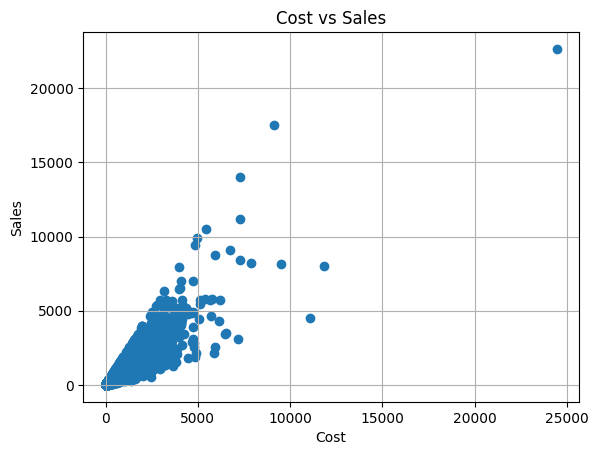

In [ ]:
plt.scatter(global_superstore['Cost'], global_superstore['Sales'])
plt.title('Cost vs Sales')
plt.xlabel('Cost')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

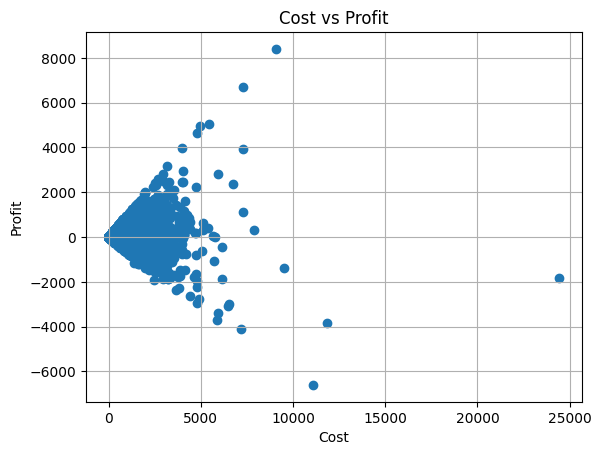

In [ ]:
plt.scatter(global_superstore['Cost'], global_superstore['Profit'])
plt.title('Cost vs Profit')
plt.xlabel('Cost')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

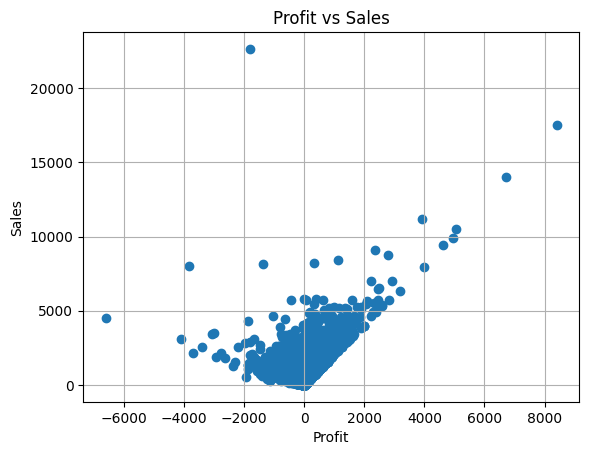

In [ ]:
plt.scatter(global_superstore['Profit'], global_superstore['Sales'])
plt.title('Profit vs Sales')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

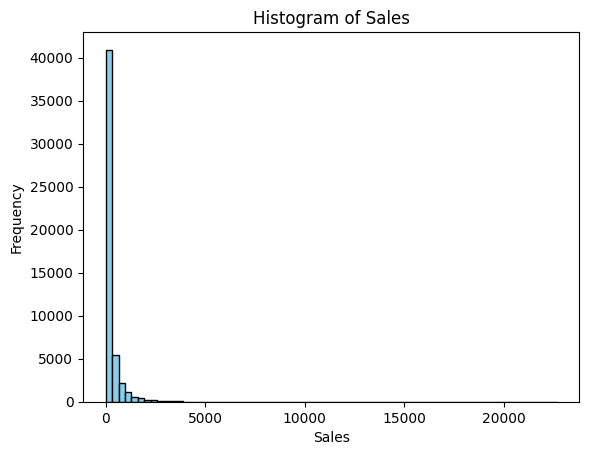

In [ ]:
plt.hist(global_superstore['Sales'], bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

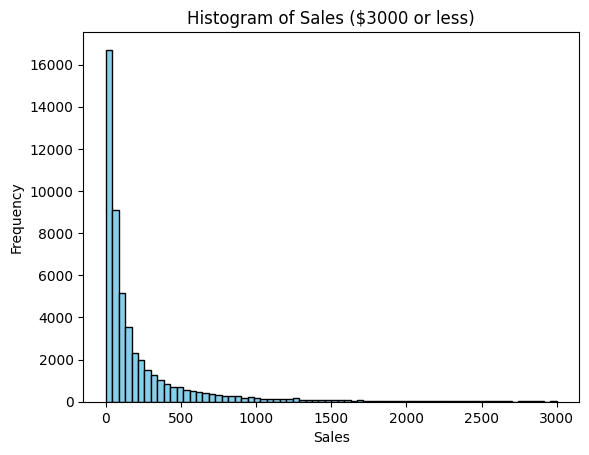

In [ ]:
filtered_sales = global_superstore[global_superstore['Sales'] <= 3000]['Sales']

plt.hist(filtered_sales, bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Sales ($3000 or less)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

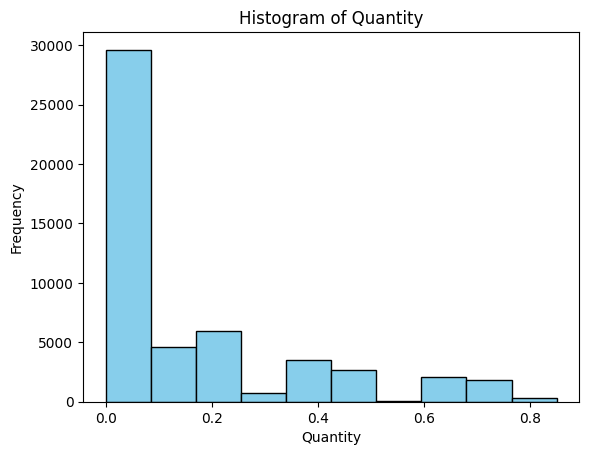

In [ ]:
plt.hist(global_superstore['Discount'], color='skyblue', edgecolor='black')

plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

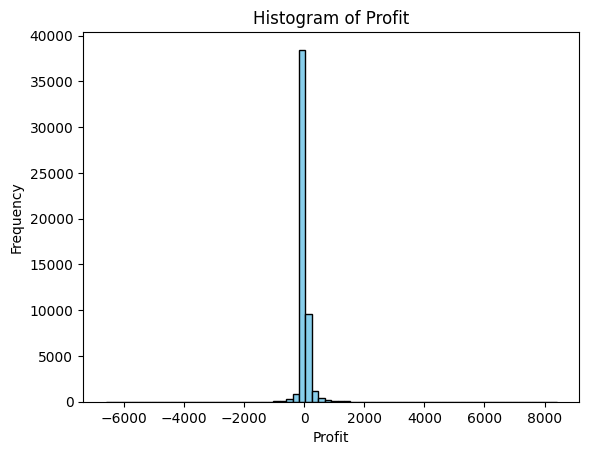

In [ ]:
plt.hist(global_superstore['Profit'], bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

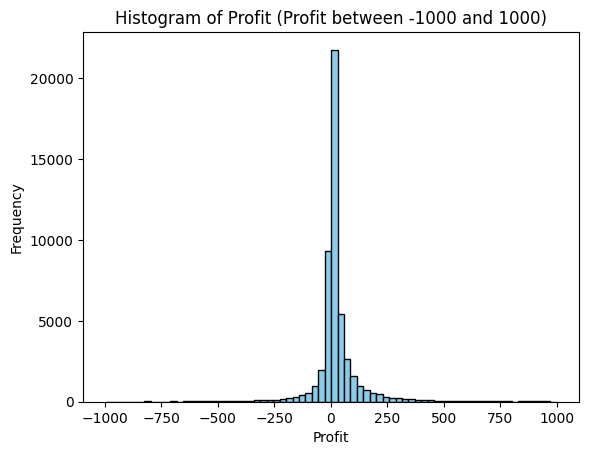

In [ ]:
filtered_profit = global_superstore[(global_superstore['Profit'] >= -1000) & (global_superstore['Profit'] <= 1000)]['Profit']

plt.hist(filtered_profit, bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Profit (Profit between -1000 and 1000)')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

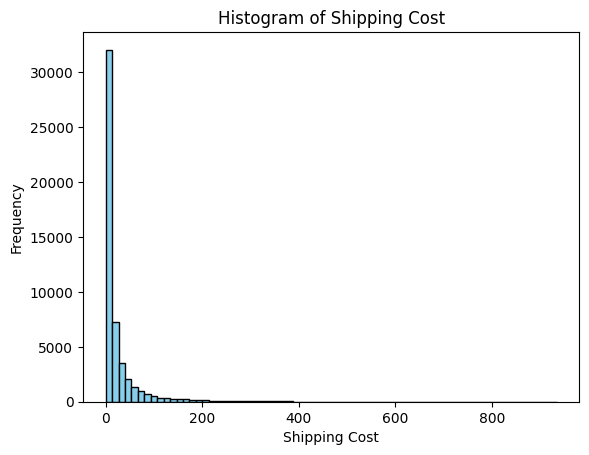

In [ ]:
plt.hist(global_superstore['Shipping Cost'], bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Shipping Cost')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.show()

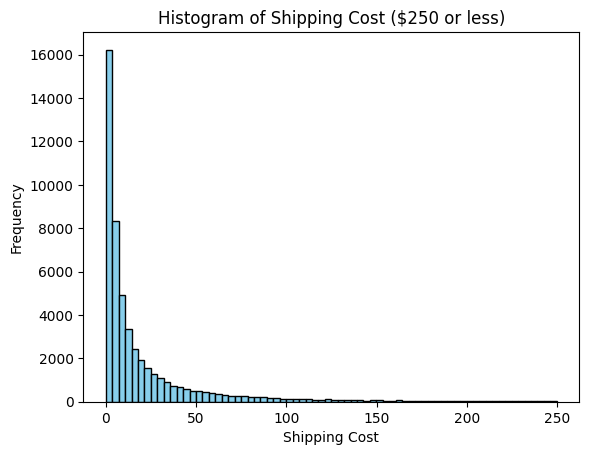

In [ ]:
filtered_shipping_cost = global_superstore[global_superstore['Shipping Cost'] <= 250]['Shipping Cost']

plt.hist(filtered_shipping_cost, bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Shipping Cost ($250 or less)')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.show()

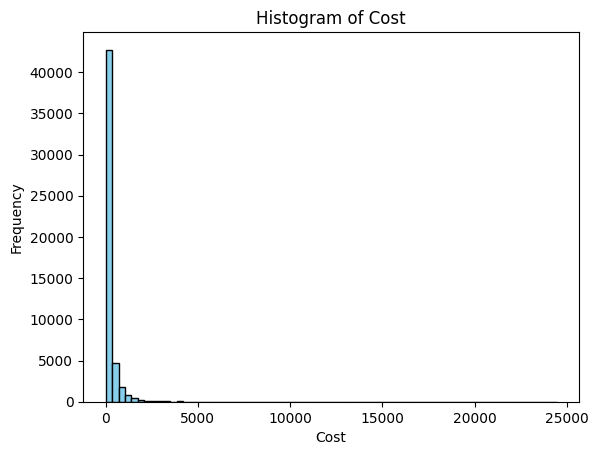

In [ ]:
plt.hist(global_superstore['Cost'], bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

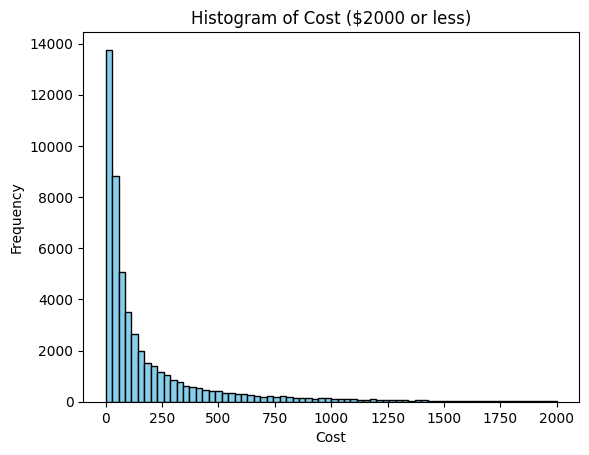

In [ ]:
filtered_cost = global_superstore[global_superstore['Cost'] <= 2000]['Cost']

plt.hist(filtered_cost, bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Cost ($2000 or less)')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

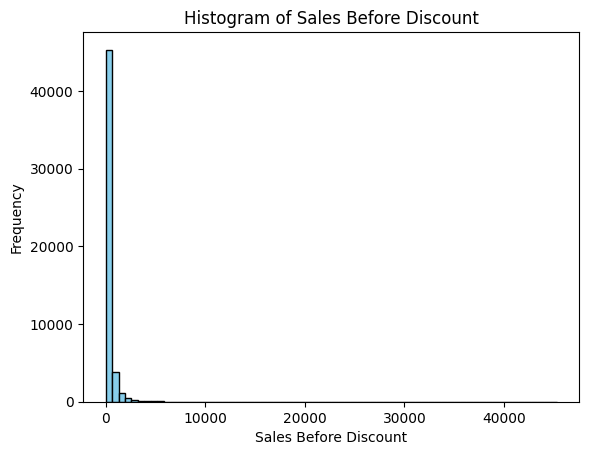

In [ ]:
plt.hist(global_superstore['Sales Before Discount'], bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Sales Before Discount')
plt.xlabel('Sales Before Discount')
plt.ylabel('Frequency')
plt.show()

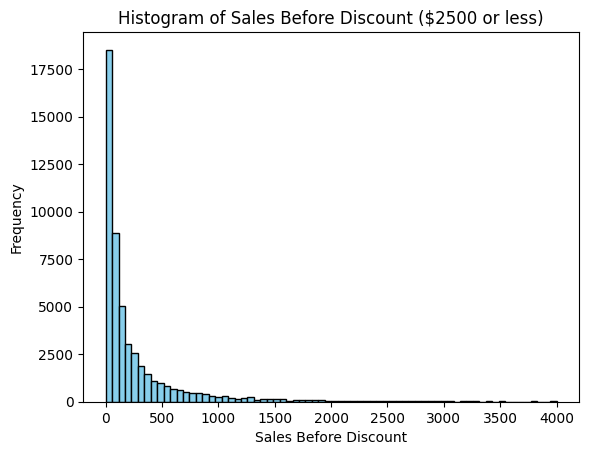

In [ ]:
filtered_sales_before_discount = global_superstore[global_superstore['Sales Before Discount'] <= 4000]['Sales Before Discount']

plt.hist(filtered_sales_before_discount, bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Sales Before Discount ($2500 or less)')
plt.xlabel('Sales Before Discount')
plt.ylabel('Frequency')
plt.show()

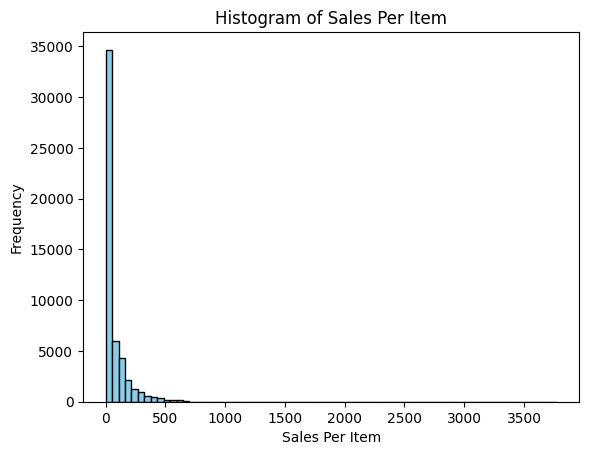

In [ ]:
plt.hist(global_superstore['Sales Per Item'], bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Sales Per Item')
plt.xlabel('Sales Per Item')
plt.ylabel('Frequency')
plt.show()

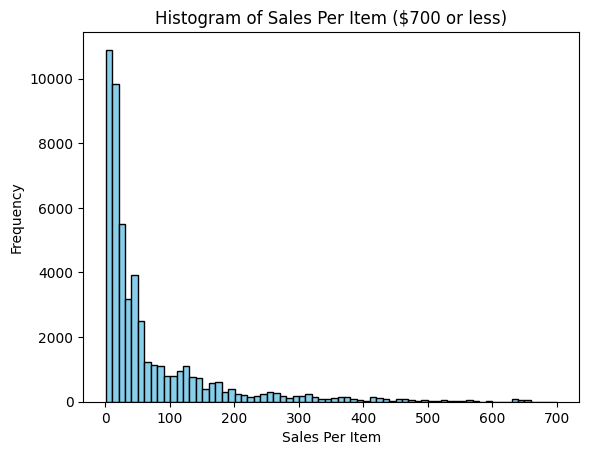

In [ ]:
filtered_sales_per_item = global_superstore[global_superstore['Sales Per Item'] <= 700]['Sales Per Item']

plt.hist(filtered_sales_per_item, bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Sales Per Item ($700 or less)')
plt.xlabel('Sales Per Item')
plt.ylabel('Frequency')
plt.show()

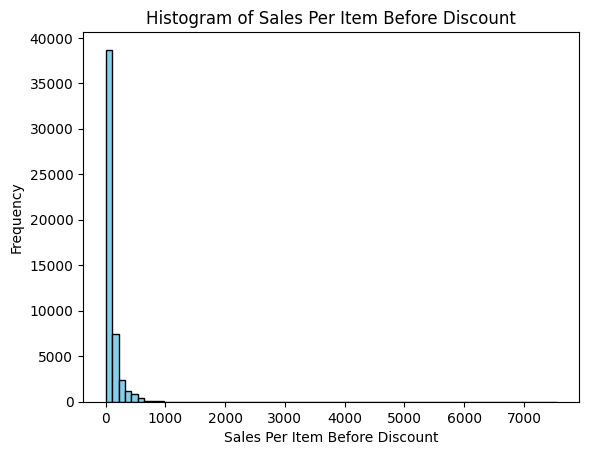

In [ ]:
plt.hist(global_superstore['Sales Per Item Before Discount'], bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Sales Per Item Before Discount')
plt.xlabel('Sales Per Item Before Discount')
plt.ylabel('Frequency')
plt.show()

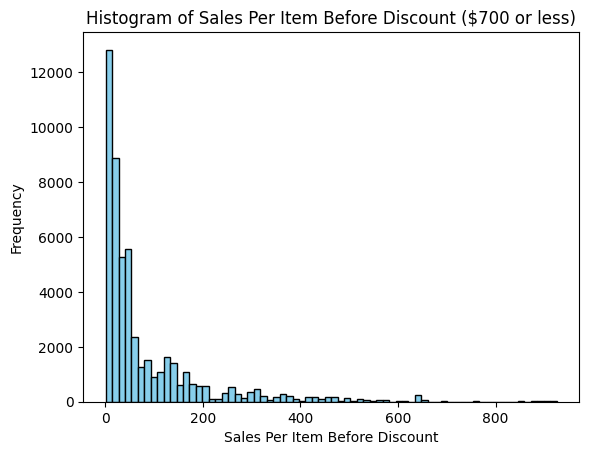

In [ ]:
filtered_sales_per_item_before_discount = global_superstore[global_superstore['Sales Per Item Before Discount'] <= 1000]['Sales Per Item Before Discount']

plt.hist(filtered_sales_per_item_before_discount, bins=70, color='skyblue', edgecolor='black')

plt.title('Histogram of Sales Per Item Before Discount ($700 or less)')
plt.xlabel('Sales Per Item Before Discount')
plt.ylabel('Frequency')
plt.show()

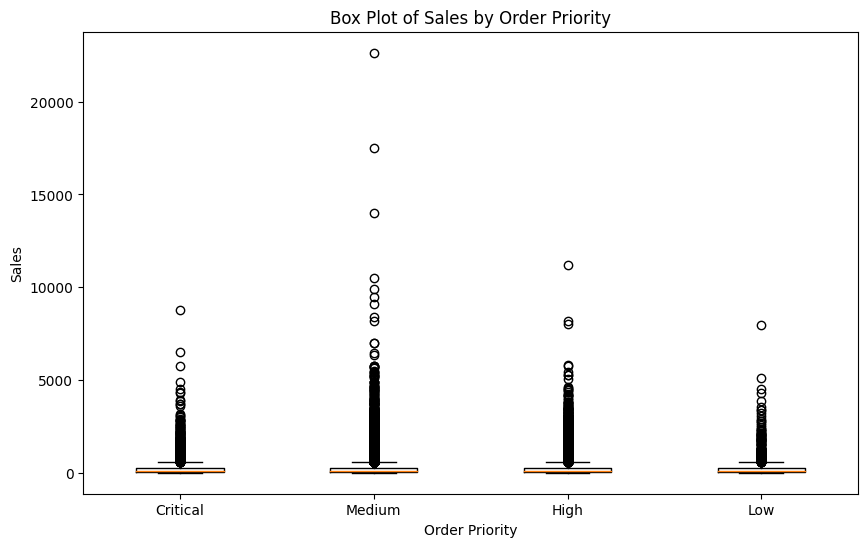

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([global_superstore[global_superstore['Order Priority'] == priority]['Sales'] for priority in global_superstore['Order Priority'].unique()],
            labels=global_superstore['Order Priority'].unique())

plt.title('Box Plot of Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Sales')
plt.show()

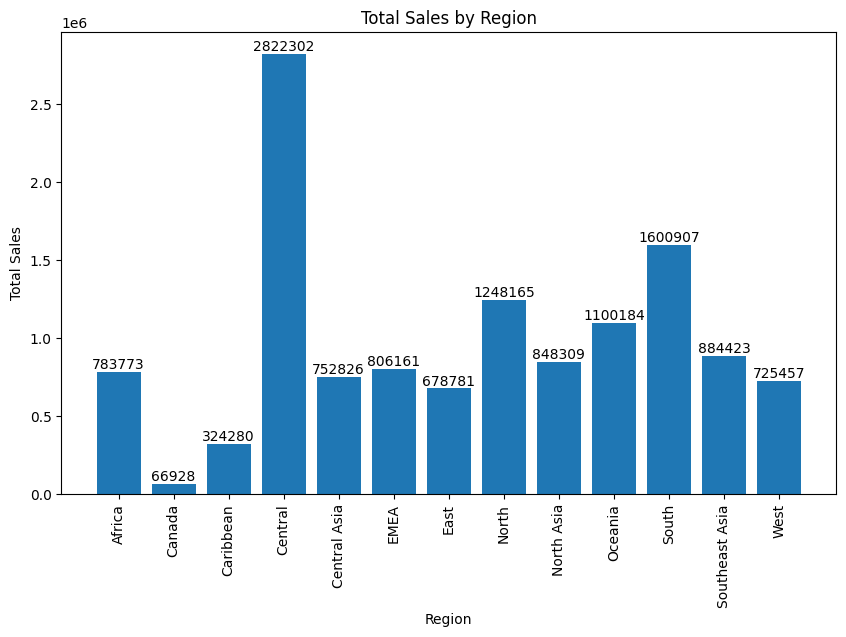

In [ ]:
sales_by_region = global_superstore.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

bars = plt.bar(sales_by_region['Region'], sales_by_region['Sales'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

plt.xticks(rotation=90)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.show()

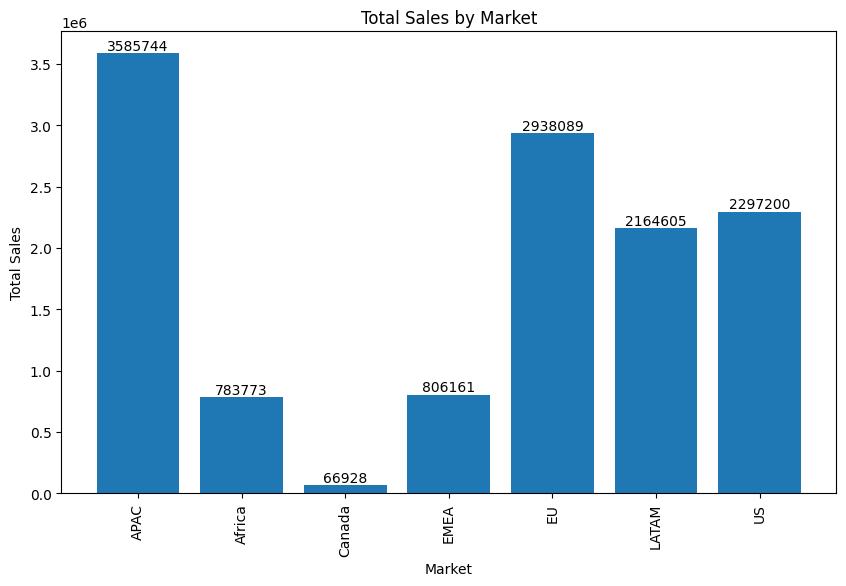

In [ ]:
sales_by_market = global_superstore.groupby('Market')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

bars = plt.bar(sales_by_market['Market'], sales_by_market['Sales'])
plt.title('Total Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')

plt.xticks(rotation=90)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

sales_by_country = global_superstore.groupby('Country')['Sales'].sum().reset_index()

country_map = go.Choropleth(
    locations=sales_by_country['Country'],
    z=sales_by_country['Sales'],
    locationmode='country names',
    text=sales_by_country['Country'],
    colorscale='blues',
    colorbar={'title': 'Total Sales'}
)

layout = go.Layout(
    title='Total Sales per Country',
    geo=dict(
        showframe=False,
        projection={'type': 'mercator'}
    )
)

choromap = go.Figure(data=[country_map], layout=layout)
iplot(choromap)

In [ ]:
global_superstore['Sub-Category'].nunique()

17

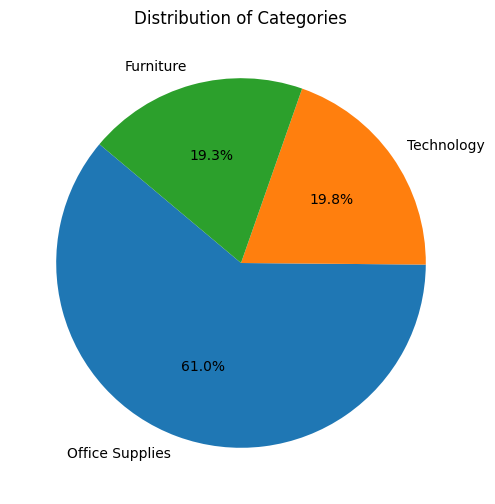

In [ ]:
category_counts = global_superstore['Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.show()

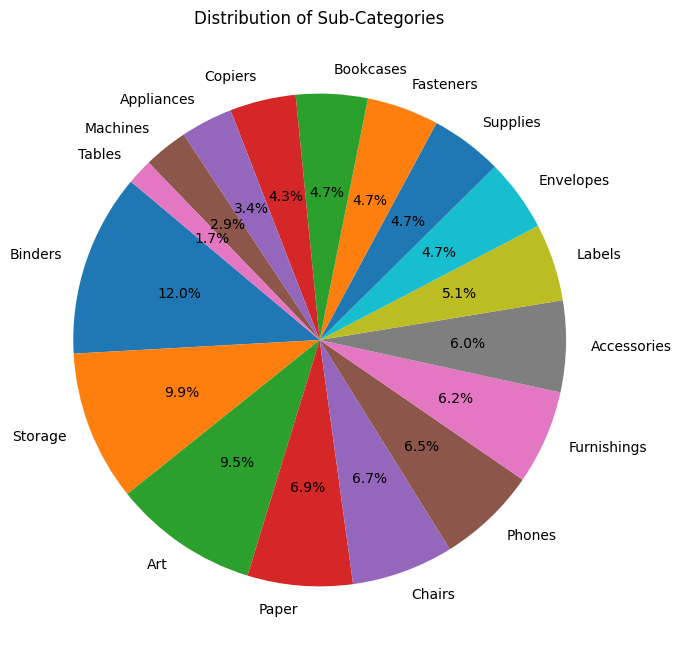

In [ ]:
sub_category_counts = global_superstore['Sub-Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sub_category_counts, labels=sub_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sub-Categories')
plt.show()

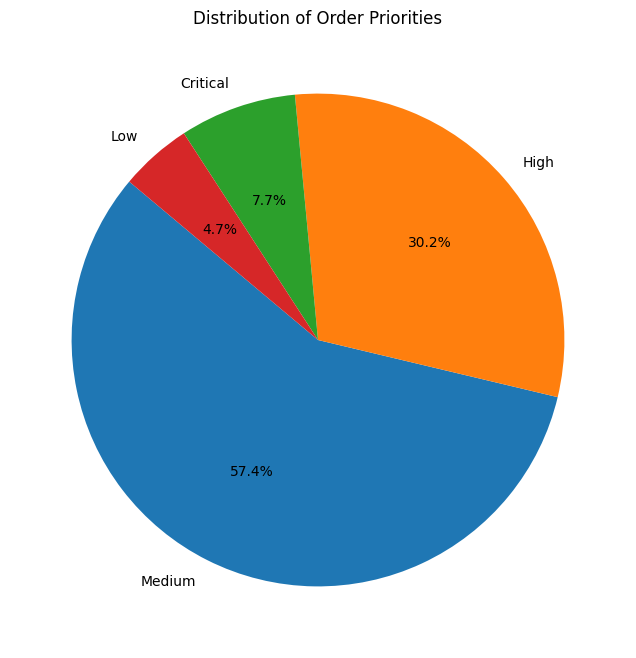

In [ ]:
order_priority_counts = global_superstore['Order Priority'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(order_priority_counts, labels=order_priority_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Order Priorities')
plt.show()

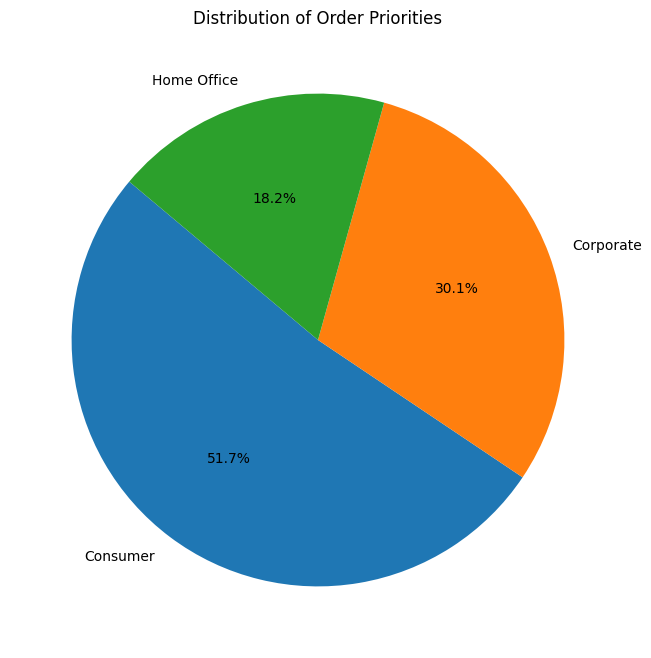

In [ ]:
segment_counts = global_superstore['Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Order Priorities')
plt.show()

In [ ]:
month_year_sales_aggregated = global_superstore.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()
month_year_sales_aggregated

,Order Year,Order Month,Sales
0,2011,1,98898.48886
1,2011,2,91152.15698
2,2011,3,145729.36736
3,2011,4,116915.76418
4,2011,5,146747.83610
5,2011,6,215207.38022
6,2011,7,115510.41912
7,2011,8,207581.49122
8,2011,9,290214.45534
9,2011,10,199071.26404


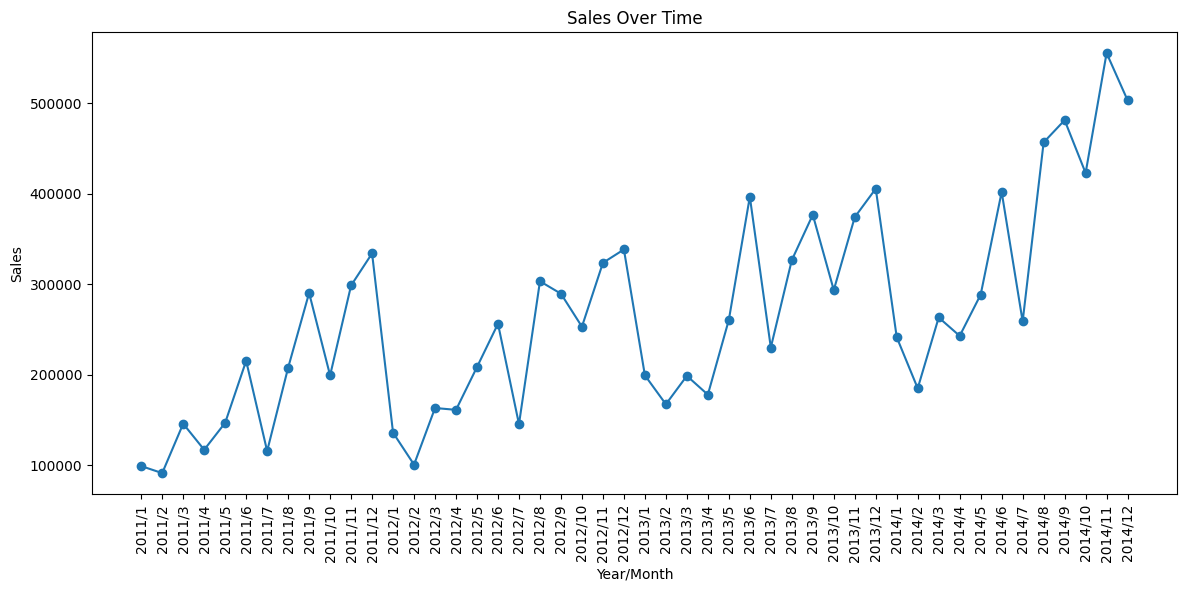

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(month_year_sales_aggregated['Order Year'].astype(str) + '/' + month_year_sales_aggregated['Order Month'].astype(str), month_year_sales_aggregated['Sales'], marker='o')

ax.set_xlabel('Year/Month')
ax.set_ylabel('Sales')
ax.set_title('Sales Over Time')
plt.xticks(rotation=90)
plt.show()

In [ ]:
month_year_profit_aggregated = global_superstore.groupby(['Order Year', 'Order Month'])['Profit'].sum().reset_index()
month_year_profit_aggregated

,Order Year,Order Month,Profit
0,2011,1,8321.80096
1,2011,2,12417.90698
2,2011,3,15303.56826
3,2011,4,12902.32438
4,2011,5,12183.82870
5,2011,6,23415.24702
6,2011,7,5585.00352
7,2011,8,23713.66772
8,2011,9,35776.88394
9,2011,10,25963.41834


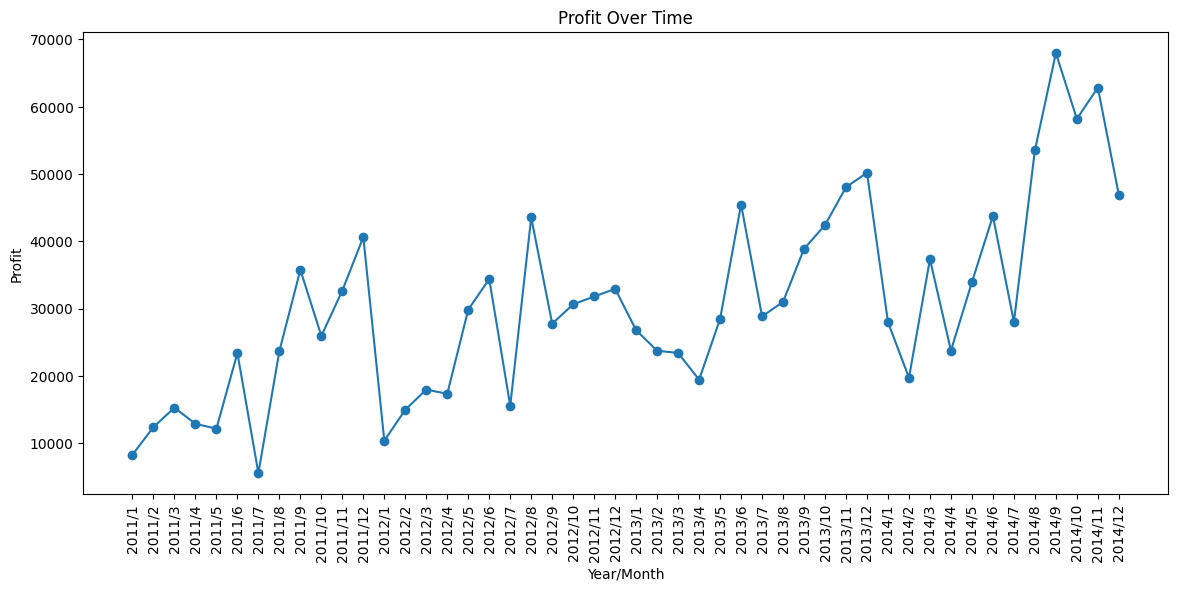

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(month_year_profit_aggregated['Order Year'].astype(str) + '/' + month_year_profit_aggregated['Order Month'].astype(str), month_year_profit_aggregated['Profit'], marker='o')

ax.set_xlabel('Year/Month')
ax.set_ylabel('Profit')
ax.set_title('Profit Over Time')
plt.xticks(rotation=90)
plt.show()

 Part A. (2) Data Preprocessing and Feature Selections

We would like to do classification of the attibute Sub-Category, to be able to predict Sub-Category based on other features. First, we do some preprocessing:

We get rid of the Order Priority column, since we have Order Priority Numerical, which is more useful.

In [25]:
global_superstore_preprocessed_phase4 = global_superstore.drop('Order Priority', axis = 1)

We tried doing one hot encoding for all categorical variables, but there are so many that this uses all available RAM and the session crashes. So we decided to drop Order ID, Order Date, Ship Date, Customer ID, Customer Name, and Product ID, since those categorical variables have a lot of unique values (so they require a lot of space for encoding) and we believe that they are not significant for sub-category prediction.

In [26]:
global_superstore_preprocessed_phase4 = global_superstore_preprocessed_phase4.drop(['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Product ID'], axis = 1)

In [27]:
global_superstore_preprocessed_phase4

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,...,Cost,Sales Before Discount,Sales Per Item,Sales Per Item Before Discount,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
0,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,...,1547.4655,2309.65,329.950,329.95,2012,7,31,2012,7,31
1,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",...,3998.1600,4121.55,412.155,457.95,2013,2,5,2013,2,7
2,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",...,4255.2000,5750.19,575.019,638.91,2013,10,17,2013,10,18
3,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",...,2989.0500,3213.90,578.502,642.78,2013,1,28,2013,1,30
4,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",...,2521.4400,2832.96,354.120,354.12,2013,11,5,2013,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Same Day,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",...,60.6000,65.10,13.020,13.02,2014,6,19,2014,6,19
51286,Standard Class,Consumer,Houston,Texas,United States,US,Central,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,...,1.5540,2.22,0.444,2.22,2014,6,20,2014,6,24
51287,Same Day,Home Office,Oxnard,California,United States,US,West,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",...,11.6892,22.92,7.640,7.64,2013,12,2,2013,12,2
51288,Standard Class,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,Office Supplies,Binders,"Acco Index Tab, Economy",...,11.0400,13.44,6.720,6.72,2012,2,18,2012,2,22


In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# This didn't work due to limited RAM
#categorical_columns = ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
#                       'Product ID', 'Category', 'Product Name']

# This works
categorical_columns = ['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
                       'Category', 'Product Name']  # One-hot encoding is done on the categorical attributes of the dataset

categorical_data = global_superstore_preprocessed_phase4[categorical_columns]

encoder = OneHotEncoder(sparse = False)
encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns)) # Convert to dataframe

global_superstore_preprocessed_phase4 = pd.concat([global_superstore_preprocessed_phase4, encoded_df], axis=1) # Concatenate to global_superstore_preprocessed_phase4
global_superstore_preprocessed_phase4.drop(categorical_columns, axis=1, inplace=True) # Drop original categorical variables

C:\Users\micic\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
global_superstore_preprocessed_phase4

,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority Numerical,Cost,Sales Before Discount,Sales Per Item,...,Product Name_Zebra ZM400 Thermal Label Printer,Product Name_Zebra Zazzle Fluorescent Highlighters,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service
0,Accessories,2309.650,7,0.0,762.1845,933.57,4,1547.4655,2309.65,329.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chairs,3709.395,9,0.1,-288.7650,923.63,4,3998.1600,4121.55,412.155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Phones,5175.171,9,0.1,919.9710,915.49,2,4255.2000,5750.19,575.019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Phones,2892.510,5,0.1,-96.5400,910.16,2,2989.0500,3213.90,578.502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Copiers,2832.960,8,0.0,311.5200,903.04,4,2521.4400,2832.96,354.120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Fasteners,65.100,5,0.0,4.5000,0.01,2,60.6000,65.10,13.020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51286,Appliances,0.444,1,0.8,-1.1100,0.01,2,1.5540,2.22,0.444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51287,Envelopes,22.920,3,0.0,11.2308,0.01,3,11.6892,22.92,7.640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51288,Binders,13.440,2,0.0,2.4000,0.00,2,11.0400,13.44,6.720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we normalize the numerical attributes.

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority Numerical', 'Cost', 'Sales Before Discount', 'Sales Per Item',
                     'Sales Per Item Before Discount', 'Order Year', 'Order Month', 'Order Day', 'Ship Year', 'Ship Month', 'Ship Day']
# This normalizes the numerical columns so that they are all between 0 and 1
global_superstore_preprocessed_phase4[numerical_columns] = scaler.fit_transform(global_superstore_preprocessed_phase4[numerical_columns])

In [31]:
global_superstore_preprocessed_phase4['Profit']

0        0.490812
1        0.420749
2        0.501331
3        0.433564
4        0.460768
           ...   
51285    0.440300
51286    0.439926
51287    0.440749
51288    0.440160
51289    0.440120
Name: Profit, Length: 51290, dtype: float64

Now we see what are the 10 best features for predicting Sub-Category

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

X = global_superstore_preprocessed_phase4.drop(columns=['Sub-Category'])
y = global_superstore_preprocessed_phase4['Sub-Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into train and test, so that we can train the model on the train set

selector = SelectKBest(score_func=f_classif)
selector.fit(X_train, y_train)
selected_features_indices = selector.get_support(indices=True)
feature_scores = selector.scores_
feature_names = X_train.columns

for i, score in zip(selected_features_indices, feature_scores[selected_features_indices]): # So that we can see the selected features and their scores
    print(f"Feature '{feature_names[i]}' has score: {score}")

# Transform the original data to contain only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

C:\Users\micic\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  35   36   80  111  113  136  146  147  157  164  177  186  188  203
  210  234  263  320  377  387  479  492  499  539  590  592  595  664
  675  679  685  687  706  774  816  852  856  863  894  926  934  944
  976  993 1019 1020 1028 1046 1057 1081 1084 1104 1109 1118 1132 1250
 1282 1298 1299 1349 1364 1381 1390 1415 1429 1454 1458 1466 1513 1560
 1567 1649 1751 1769 1779 1801 1824 1844 1904 1910 1919 1941 1972 2004
 2010 2108 2158 2193 2229 2256 2304 2309 2345 2372 2406 2419 2489 2490
 2501 2525 2552 2558 2639 2664 2673 2697 2698 2717 2799 2820 2917 2978
 2982 3019 3040 3055 3060 3068 3076 3099 3154 3178 3217 3258 3310 3344
 3388 3436 3450 3483 3501 3567 3569 3584 3638 3721 3824 3862 3958 4066
 4089 4093 4202 4324 4390 4434 4435 4551 4566 4585 4615 4703 4743 4744
 4920 4921 4922 5360 5379 5447 5506 5699 5720 5844 6009 6190 6291 6292
 6701 6702 6795 6816 6993 7

Feature 'Sales' has score: 669.4020059794417
Feature 'Shipping Cost' has score: 530.7101067014503
Feature 'Cost' has score: 760.1324627594009
Feature 'Sales Before Discount' has score: 641.6545059602795
Feature 'Sales Per Item' has score: 1239.561443984775
Feature 'Sales Per Item Before Discount' has score: 1286.4424052010877
Feature 'Market_US' has score: 148.5277148954616
Feature 'Category_Furniture' has score: inf
Feature 'Category_Office Supplies' has score: inf
Feature 'Category_Technology' has score: inf


The top 10 features are Sales, Shipping Cost, Cost, Sales Before Discount, Sales Per Item, Sales Per Item Before Discount, Market_US, Category_Furniture, Category_Office Supplies, and Category_Technology.

### Part B. Classification (Supervised Learning)

Now we move on to classification.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

#### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = global_superstore_preprocessed_phase4[['Sales', 'Shipping Cost', 'Cost', 'Sales Before Discount', 'Sales Per Item', 
                       'Sales Per Item Before Discount', 'Market_US', 'Category_Furniture', 
                       'Category_Office Supplies', 'Category_Technology']]
y = global_superstore_preprocessed_phase4['Sub-Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into train and test, so that we can train the model on the train set

model = DecisionTreeClassifier(random_state=42) # Training the decision tree classifier
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Predictions of test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(" ")

# To see precision and recall per sub-category
print(classification_report(y_test, y_pred))

Accuracy: 0.846753753168259
Precision: 0.8476075082569683
Recall: 0.846753753168259
 
              precision    recall  f1-score   support

 Accessories       0.90      0.92      0.91       595
  Appliances       0.88      0.90      0.89       337
         Art       0.86      0.86      0.86       953
     Binders       0.82      0.80      0.81      1246
   Bookcases       0.91      0.94      0.93       470
      Chairs       0.91      0.89      0.90       691
     Copiers       0.95      0.95      0.95       461
   Envelopes       0.76      0.70      0.73       484
   Fasteners       0.61      0.65      0.63       469
 Furnishings       0.96      0.94      0.95       635
      Labels       0.71      0.71      0.71       505
    Machines       0.91      0.90      0.90       309
       Paper       0.76      0.82      0.79       689
      Phones       0.92      0.92      0.92       698
     Storage       0.89      0.88      0.89      1051
    Supplies       0.80      0.76      0.78      

#### Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

X = global_superstore_preprocessed_phase4[['Sales', 'Shipping Cost', 'Cost', 'Sales Before Discount', 'Sales Per Item', 
                       'Sales Per Item Before Discount', 'Market_US', 'Category_Furniture', 
                       'Category_Office Supplies', 'Category_Technology']]
y = global_superstore_preprocessed_phase4['Sub-Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into train and test, so that we can train the model on the train set

model = GradientBoostingClassifier(random_state=42) # Training the gradient boosting classifier
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Predictions of test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(" ")

# To see precision and recall per sub-category
print(classification_report(y_test, y_pred))

Accuracy: 0.6657243127315267
Precision: 0.6808726451577332
Recall: 0.6657243127315267
 
              precision    recall  f1-score   support

 Accessories       0.75      0.90      0.82       595
  Appliances       0.87      0.62      0.72       337
         Art       0.49      0.68      0.57       953
     Binders       0.57      0.63      0.59      1246
   Bookcases       0.83      0.85      0.84       470
      Chairs       0.79      0.80      0.80       691
     Copiers       0.83      0.84      0.83       461
   Envelopes       0.73      0.10      0.17       484
   Fasteners       0.48      0.55      0.51       469
 Furnishings       0.89      0.92      0.91       635
      Labels       0.47      0.64      0.54       505
    Machines       0.74      0.52      0.61       309
       Paper       0.54      0.53      0.53       689
      Phones       0.82      0.79      0.80       698
     Storage       0.76      0.72      0.74      1051
    Supplies       0.52      0.32      0.39    

#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

X = global_superstore_preprocessed_phase4[['Sales', 'Shipping Cost', 'Cost', 'Sales Before Discount', 'Sales Per Item', 
                       'Sales Per Item Before Discount', 'Market_US', 'Category_Furniture', 
                       'Category_Office Supplies', 'Category_Technology']]
y = global_superstore_preprocessed_phase4['Sub-Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Split the data into train and test, so that we can train the model on the train set

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)  # Predictions of test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(" ")

# To see precision and recall per sub-category
print(classification_report(y_test, y_pred))

Accuracy: 0.7361084031975044
Precision: 0.7350313930404999
Recall: 0.7361084031975044
 
              precision    recall  f1-score   support

 Accessories       0.81      0.88      0.85       595
  Appliances       0.90      0.68      0.77       337
         Art       0.69      0.75      0.72       953
     Binders       0.71      0.75      0.73      1246
   Bookcases       0.83      0.88      0.86       470
      Chairs       0.83      0.81      0.82       691
     Copiers       0.86      0.82      0.84       461
   Envelopes       0.53      0.37      0.44       484
   Fasteners       0.54      0.56      0.55       469
 Furnishings       0.91      0.92      0.91       635
      Labels       0.55      0.61      0.58       505
    Machines       0.78      0.64      0.70       309
       Paper       0.63      0.67      0.65       689
      Phones       0.82      0.85      0.83       698
     Storage       0.79      0.82      0.80      1051
    Supplies       0.56      0.46      0.51    